In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data_set=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Leaf_photos",image_size=(256,256),batch_size=15)

Found 117 files belonging to 3 classes.


In [39]:
data_set.class_names

['EarlyBlight', 'Healthy', 'LateBlight']

In [40]:
data_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

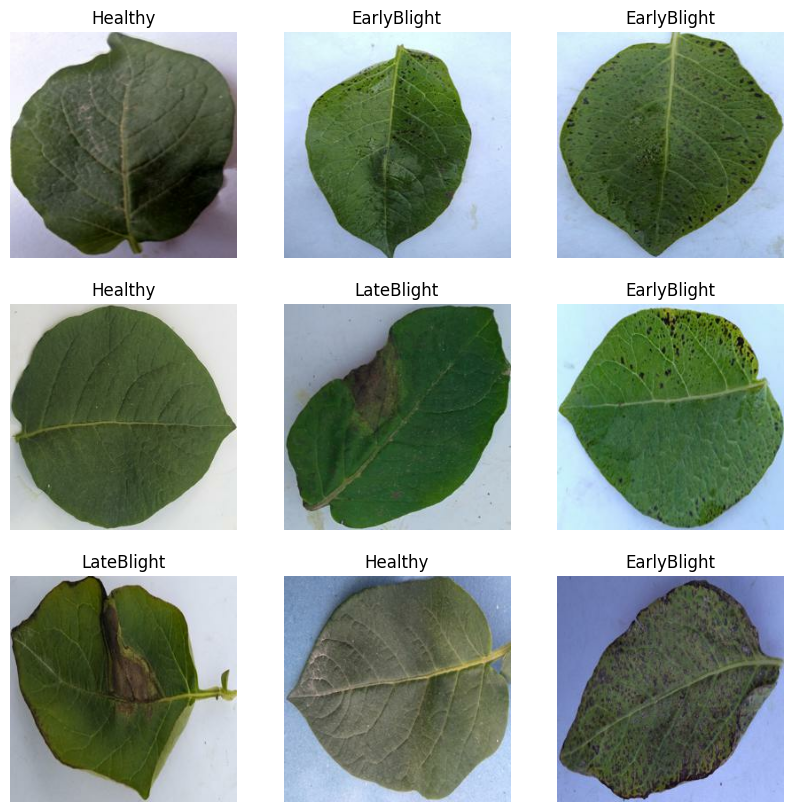

In [41]:
plt.figure(figsize=(10,10))
for image,label in data_set.take(3):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(data_set.class_names[label[i]])
    plt.axis("off")

In [42]:
def get_dataset_split(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  dataset_size=len(dataset)
  if shuffle:
    dataset=dataset.shuffle(shuffle_size,seed=12)
  train_ds=dataset.take(round(dataset_size*train_split))
  test_ds=dataset.skip(round(dataset_size*train_split))
  val_ds=train_ds.take(round(dataset_size*val_split))
  return train_ds,test_ds,val_ds

In [43]:
train_ds,test_ds,val_ds=get_dataset_split(data_set)

In [44]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=10)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=10)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=10)

In [45]:
len(test_ds)

2

In [46]:
model=keras.Sequential([
    # resacling and resizing
    keras.layers.experimental.preprocessing.Resizing(256,256),
    keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(256,256,3)),

    #Data agumentation
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.2),

    #CNN Network layers
    keras.layers.Conv2D(filters=10,kernel_size=(2,2),activation="relu",input_shape=(256,256,3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=10,kernel_size=(2,2),activation="relu",input_shape=(256,256,3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])

In [47]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [48]:
history=model.fit(train_ds,epochs=200,validation_data=val_ds)

Epoch 1/200
6/6 [==============================] - 3s 146ms/step - loss: 2.4241 - accuracy: 0.3678 - val_loss: 1.8040 - val_accuracy: 0.4000
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 1.8003 - accuracy: 0.3908 - val_loss: 2.2467 - val_accuracy: 0.2667
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 1.4015 - accuracy: 0.3563 - val_loss: 1.2071 - val_accuracy: 0.4000
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 1.0135 - accuracy: 0.4713 - val_loss: 0.9366 - val_accuracy: 0.6000
Epoch 5/200
6/6 [==============================] - 0s 16ms/step - loss: 1.0129 - accuracy: 0.4598 - val_loss: 0.8038 - val_accuracy: 0.7333
Epoch 6/200
6/6 [==============================] - 0s 15ms/step - loss: 0.9538 - accuracy: 0.4943 - val_loss: 0.8250 - val_accuracy: 0.7333
Epoch 7/200
6/6 [==============================] - 0s 17ms/step - loss: 0.9412 - accuracy: 0.5632 - val_loss: 0.8393 - val_accuracy: 0.7333
Epoch 8/200
6/6 [==

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1/1 [==============================] - 0s 17ms/step


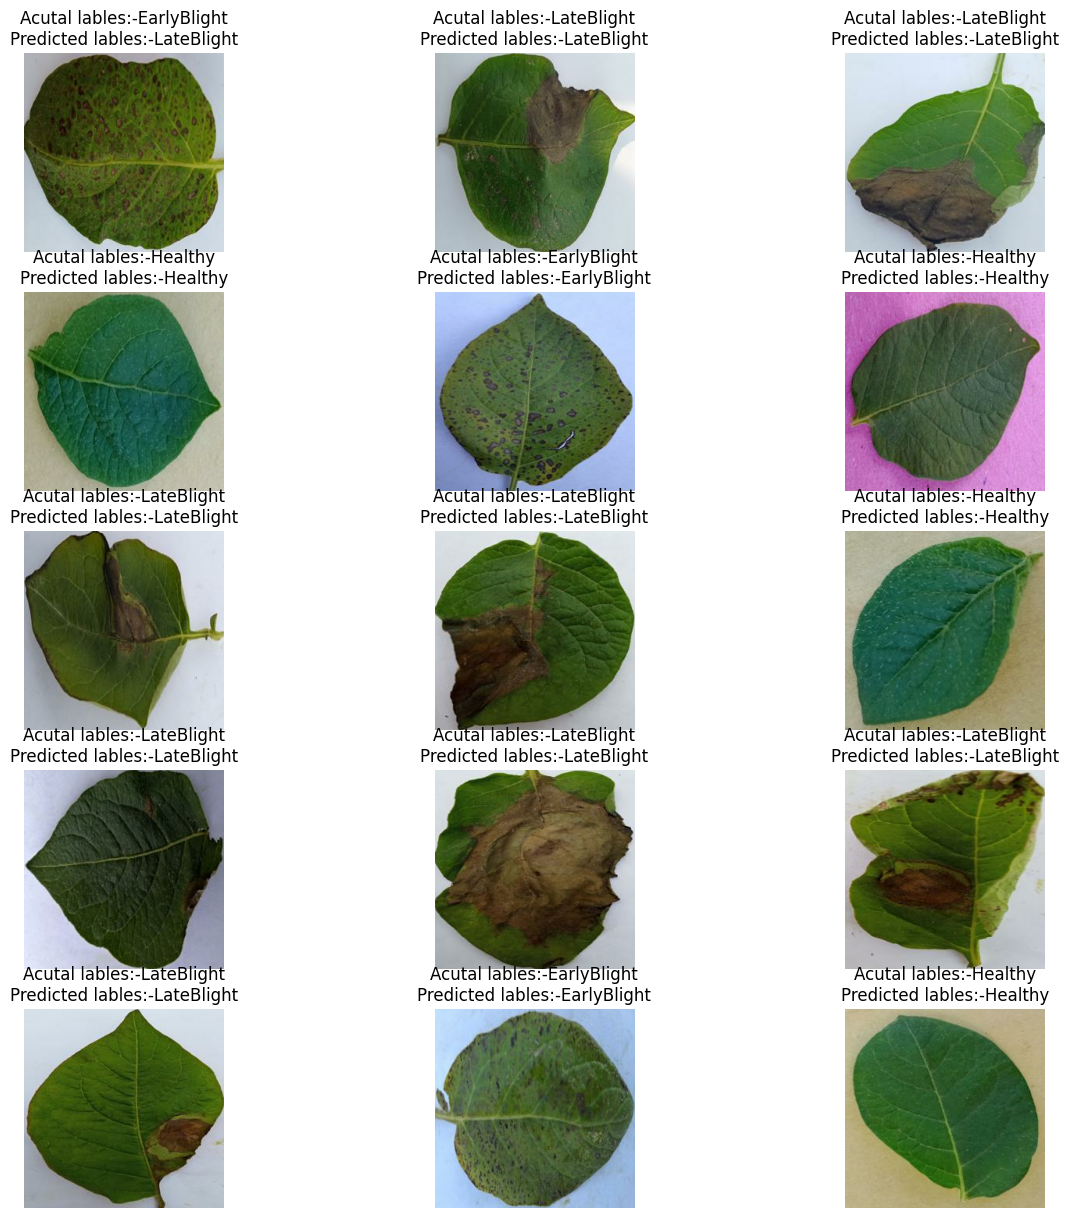

1/1 [==============================] - 0s 18ms/step


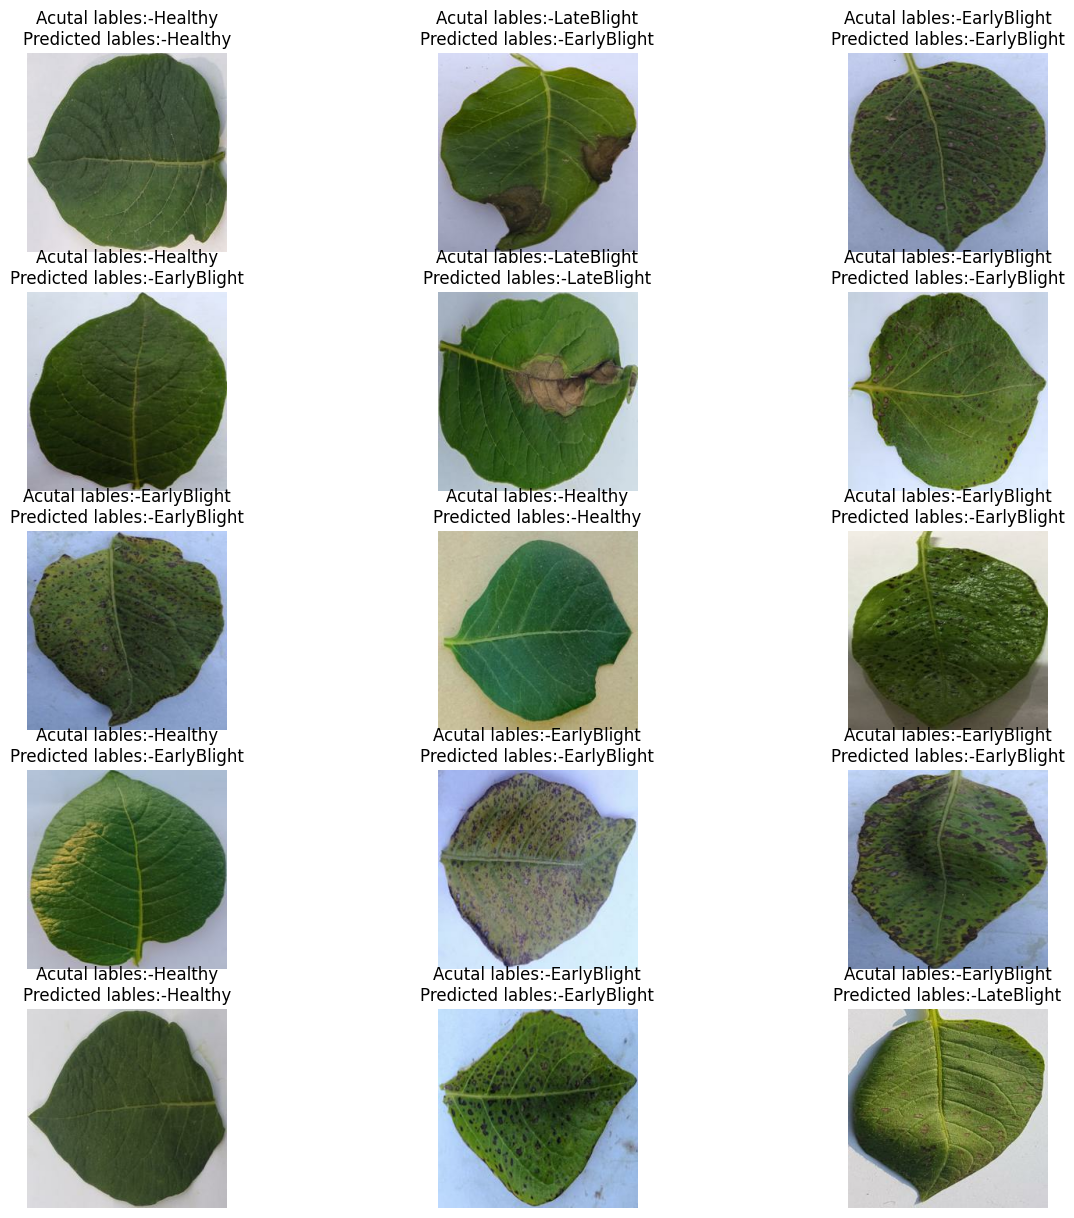

In [101]:
plt.figure(figsize=(15,15))
for image,label in test_ds:
  for i in range(15):
    ax=plt.subplot(5,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(f"Acutal lables:-{data_set.class_names[label[i]]}\nPredicted lables:-{data_set.class_names[np.argmax(model.predict(image[i].numpy().reshape(1,256,256,3)))]}")
    plt.axis("off")